In [11]:
%matplotlib inline


Sampling from HMM
-----------------

This script shows how to sample points from a Hiden Markov Model (HMM):
we use a 4-components with specified mean and covariance.

The plot show the sequence of observations generated with the transitions
between them. We can see that, as specified by our transition matrix,
there are no transition between component 1 and 3.



In [12]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

Automatically created module for IPython interactive environment


Prepare parameters for a 4-components HMM
Initial population probability



In [24]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

print("The Covariances: ".format(covars)

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

## Cant we score here?
stublist = [
    [],
    [],
    [],
    []
]
print("Score a stub list list: {}".format(stublist))
print("Score with model: {}".format(model.score(stublist)))
      
# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

[[[ 0.5  0. ]
  [ 0.   0.5]]

 [[ 0.5  0. ]
  [ 0.   0.5]]

 [[ 0.5  0. ]
  [ 0.   0.5]]

 [[ 0.5  0. ]
  [ 0.   0.5]]]


[[ -0.57687498   1.35228951]
 [  0.72787488   1.29848566]
 [ -0.04781807   0.18630642]
 [ 10.25594665  -1.17458272]
 [  0.7182189   -0.69757998]
 [ -1.14077388   1.6988494 ]
 [ -0.89987799   0.57511486]
 [  0.24665903   0.52308338]
 [  0.84232125  -1.29339382]
 [ -0.08746568  -0.61364562]
 [  1.18367269  -0.45165987]
 [  0.13524439  -0.75891152]
 [  0.45785896  -3.04101964]
 [  0.48212362   9.69848641]
 [ -0.16092821  10.30819491]
 [ -1.24351232   0.75373166]
 [ 10.78219085  -1.45568347]
 [ 10.0977948   -0.59027169]
 [ -0.07791923  -0.93398204]
 [  1.07023576   0.4675951 ]]
[0 0 0 3 0 0 0 0 0 0 0 0 0 1 1 0 3 3 0 0]


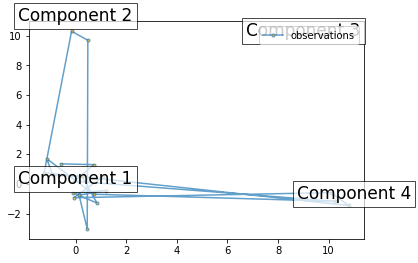

In [23]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
    
# Generate samples
X, Z = model.sample(20)

print(X)
print(Z)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()